In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("test.csv")
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Task 1 (Test.csv file)

In [3]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
new_df=df.dropna()

In [5]:
new_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
new_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
...,...,...,...,...,...,...,...,...,...,...,...
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


Task 2 (Test.csv file)

In [7]:
new_df[["Age","Fare"]].mean()

Age     39.247126
Fare    98.109198
dtype: float64

In [8]:
new_df[["Age","Fare"]].median()

Age     39.0000
Fare    71.2833
dtype: float64

In [9]:
new_df[["Age","Fare"]].mode()

,Age,Fare
0,30.0,211.500
1,36.0,262.375
2,45.0,NaN
3,48.0,NaN
4,55.0,NaN


In [10]:
new_df[["Age","Fare"]].std()

Age     15.218730
Fare    88.177319
dtype: float64

Task 2 End

Task 1 continued

<Axes: >

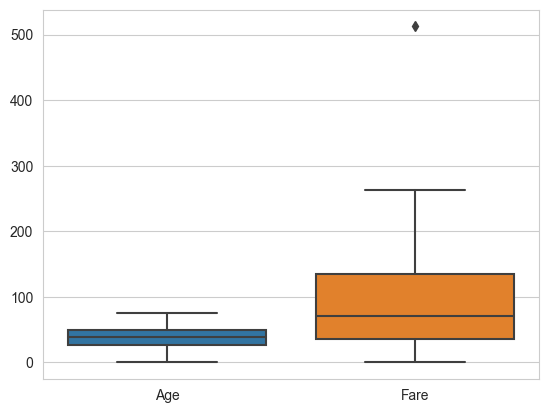

In [11]:
sns.boxplot(new_df[["Age","Fare"]])

<Axes: >

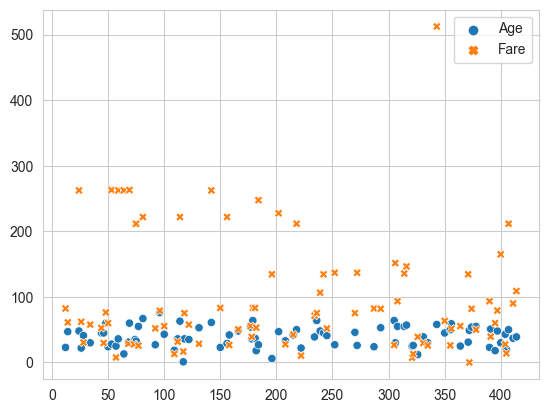

In [12]:
sns.scatterplot(new_df[["Age","Fare"]])

In [13]:
new_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,1102.712644,1.137931,39.247126,0.597701,0.482759,98.109198
std,126.751901,0.435954,15.218730,0.637214,0.860801,88.177319
min,904.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,986.000000,1.000000,27.000000,0.000000,0.000000,35.339600
50%,1094.000000,1.000000,39.000000,1.000000,0.000000,71.283300
75%,1216.000000,1.000000,50.000000,1.000000,1.000000,135.066650
max,1306.000000,3.000000,76.000000,3.000000,4.000000,512.329200


Removing Fare column outliers with IQR Method

In [14]:
IQR=135.066650-35.339600
IQR

99.72705000000002

In [15]:
lower_limit = 35.339600-1.5*IQR
upper_limit = 135.066650 +1.5*IQR

In [16]:
lower_limit,upper_limit

(-114.25097500000004, 284.65722500000004)

In [17]:
new_df[(new_df.Fare<lower_limit)|(new_df.Fare>upper_limit)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


In [18]:
new_df_with_no_outliers=new_df[(new_df.Fare>lower_limit)&(new_df.Fare<upper_limit)]
new_df_with_no_outliers

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
...,...,...,...,...,...,...,...,...,...,...,...
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


<Axes: >

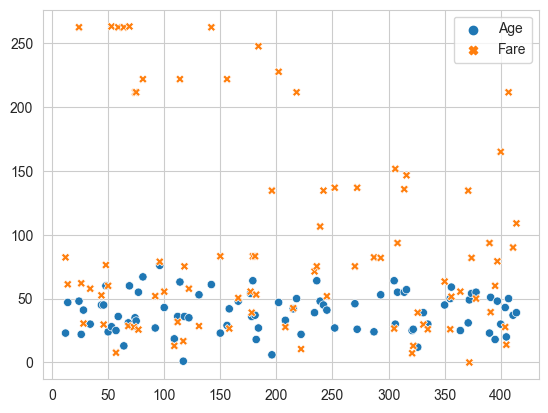

In [19]:
sns.scatterplot(new_df_with_no_outliers[["Age","Fare"]])

<Axes: >

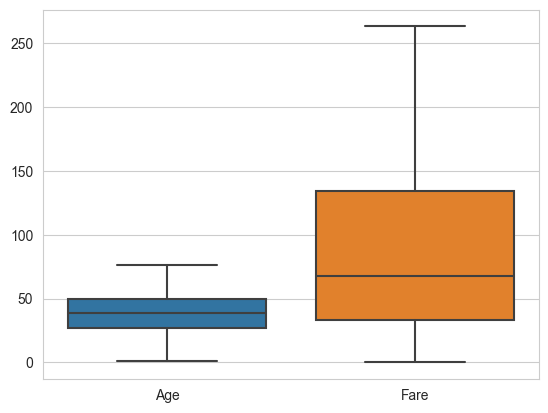

In [20]:
sns.boxplot(new_df_with_no_outliers[["Age","Fare"]])